# Data exploration summary: manufacture year

This notebook explores how manufacture year relates to sales price. The listings I pulled consisted entirely of sales ending in September of 2020, hence manufacture year is the same as laptop age. In summary:
- Newer laptops sell for more.
- Including year in the title hurts selling price, and the effect is most consistent if the laptop is older.
- There appears to be little/no relationship between listing description and year.

In [69]:
import pandas as pd

laptopData = pd.read_csv("fulldataset.csv", encoding = 'ISO-8859-1')

#since we're visualizing data in connection with year, drop missing values for year
laptopData = laptopData.dropna(subset=['year'])
laptopData['year'] = laptopData['year'].astype(int)
laptopData.head()

,itemId,description,year,size,memory,containsDescription,title,condition,price,watchCount,...,used_in_description,used_in_title,year_in_description,year_in_title,size_in_description,size_in_title,memory_in_description,memory_in_title,n_words_in_description,n_words_in_title
0,NaN,NaN,2011,17.0,16.0,0,"Used Apple MacBook Pro 17 Inch, 2.2GHz quad-co...",NaN,700.0,NaN,...,False,True,False,False,False,True,False,True,0,12
1,NaN,Used Space Gray Macbook pro 15' (2017) with To...,2017,15.0,16.0,1,Used Space Gray Macbook pro 15' (2017) with To...,NaN,1000.0,NaN,...,True,True,True,True,True,True,False,False,19,9
2,NaN,Macbook Pro A1297 Mid 2011 17' 2.3 GHz 8GB RAM...,2011,17.0,80.0,1,Macbook Pro A1297 Mid 2011 17' 2.3 GHz 8GB RAM...,NaN,310.0,NaN,...,True,True,True,True,True,True,False,False,354,15
3,2.940000e+11,I have a beautiful MacBook Pro for sale. It ha...,2009,15.0,120.0,1,Apple MacBook Pro OSX 2016 2.53GHz 4GB 120GB S...,Seller refurbished,300.0,7.0,...,True,False,False,False,True,True,True,True,286,13
4,2.750000e+11,MacBook Pro 13inch (Early 2011) in great condi...,2011,13.0,120.0,1,MacBook Pro 13-inch Early 2011 120GB SSD/10GB RAM,Used,249.0,2.0,...,False,False,True,True,True,True,True,True,906,7


As we might expect, the newer the year, the higher the final selling price:

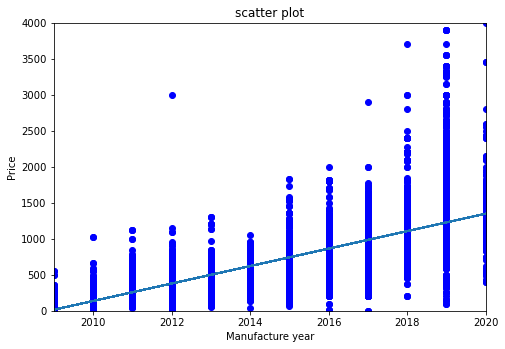

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m, b = np.polyfit(laptopData["year"], laptopData["price"], 1)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(laptopData["year"], laptopData["price"], color='b')
ax.set_xlabel('Manufacture year')
ax.set_ylabel('Price')
ax.set_title('scatter plot')
plt.plot(laptopData["year"], m*laptopData["year"] + b)
plt.xlim(2009, 2020)
plt.ylim(0, 4000)
plt.show()

Unintuitively, it's generally the case that leaving the year of manufacture out of the title is associated with higher sales price:

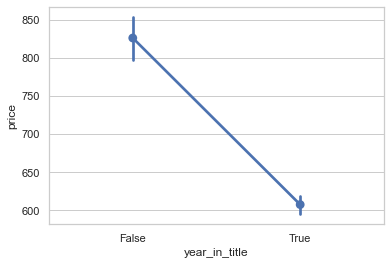

In [55]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.pointplot(x="year_in_title", y="price", data=laptopData)

A good deal of this effect comes from 2019 data...

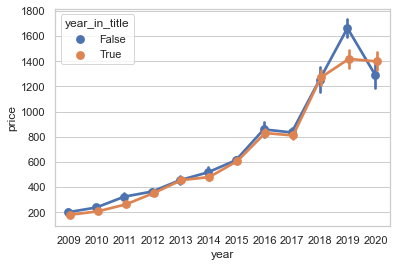

In [76]:
laptopData2 = laptopData[(laptopData['year'] >= 2009) & (laptopData['year'] <= 2020)]

ax = sns.pointplot(x="year", y="price", hue="year_in_title", dodge=True, data=laptopData2)

... but even if we restrict our attention to 2009-2017, we find that either including the manufacture year in the title doesn't help, or it hurts. 
- And it hurts sales of *older* laptops especially—2011 and older.
- Hence, when it comes to title informativity, sometimes more *isn't* more.

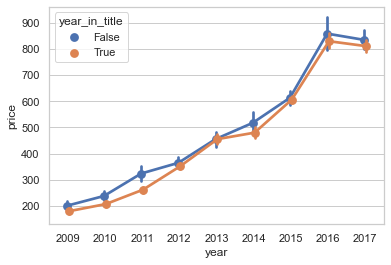

In [77]:
laptopData2 = laptopData[(laptopData['year'] >= 2009) & (laptopData['year'] <= 2017)]

ax = sns.pointplot(x="year", y="price", hue="year_in_title", dodge=True, data=laptopData2)

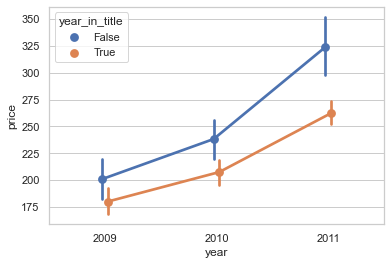

In [81]:
laptopData2 = laptopData[(laptopData['year'] >= 2009) & (laptopData['year'] <= 2011)]

ax = sns.pointplot(x="year", y="price", hue="year_in_title", dodge=True, data=laptopData2)

If you have a 2011 laptop, leaving out the year from the title might mean a **$75 difference**.

On the other hand, we don't quite obtain the same signal for listing *descriptions*. We find, more or less, nothing:

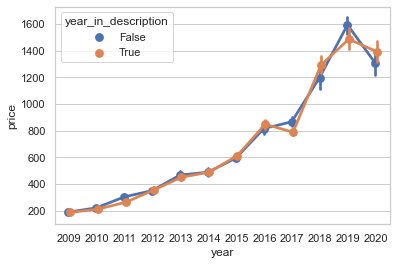

In [82]:
laptopData2 = laptopData[(laptopData['year'] >= 2009) & (laptopData['year'] <= 2020)]

ax = sns.pointplot(x="year", y="price", hue="year_in_description", dodge=True, data=laptopData2)